In [1]:
import os
# set wd

#Set your own data files path here
#path = "d:\cyk\gatech\CSE6242\ProjectCSE6242\ProjectUKdata"
path = "."
os.chdir(path)

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

### Import all data

In [3]:
#data source : https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales/version/8
#df2014_lon = pd.read_csv("accidents_london_district1-32_2014.csv",low_memory=False)
df500clust = pd.read_csv("accidents_with_clusters.csv")

In [4]:
# This is the 2014 London accident data with Cluster id mapped. 
df500clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9853 entries, 0 to 9852
Data columns (total 12 columns):
Accident_Index                9853 non-null object
Longitude                     9853 non-null float64
Latitude                      9853 non-null float64
Cluster                       9853 non-null int64
Day_of_Week                   9853 non-null int64
Hour                          9853 non-null int64
Day_of_year                   9853 non-null int64
Local_Authority_(District)    9853 non-null int64
1st_Road_Class                9853 non-null int64
1st_Road_Number               9853 non-null int64
Speed_limit                   9853 non-null int64
Accident                      9853 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 923.8+ KB


In [5]:
# Generate dataset

In [6]:
#create all data to be fed to logistics regression
df_nonacc_n_acc = pd.DataFrame(columns=[
    'Longitude','Latitude','Cluster','Day_of_Week','Hour','Day_of_year','Local_Authority_(District)','1st_Road_Class','1st_Road_Number','Speed_limit','Accident'])

#for each of the 3758 accidents, create 3 other data points
for index, row in df500clust.iterrows():
    #print(row['Accident_Index'], row['Cluster'])
    
    #add itself
    longitude = row['Longitude']
    latitude = row['Latitude']
    nclust = row['Cluster']
    dweek = row['Day_of_Week']
    nhr = row['Hour']
    nday = row['Day_of_year']
    lauthor = row['Local_Authority_(District)']
    roadclass = row['1st_Road_Class']
    roadnum = row['1st_Road_Number']
    splimit = row['Speed_limit']
    accident = row['Accident']
    dfnew = pd.DataFrame([[longitude,latitude,nclust,dweek,nhr,nday,lauthor,roadclass,roadnum,splimit,accident]], columns=['Longitude','Latitude','Cluster','Day_of_Week','Hour','Day_of_year','Local_Authority_(District)','1st_Road_Class','1st_Road_Number','Speed_limit','Accident'])
    df_nonacc_n_acc = df_nonacc_n_acc.append(dfnew,ignore_index=True)
    
    i=0
    while(i<3):
        dt_first = datetime.datetime(2010,1,1)
        nday = random.randint(1, 365)
        dtdelta = datetime.timedelta(days=nday)
        dt_targ = dt_first + dtdelta
        
        longitude = row['Longitude']
        latitude = row['Latitude']
        nclust = row['Cluster']
        dweek = dt_targ.weekday()
        nhr = random.randint(0, 23)
        lauthor = row['Local_Authority_(District)']
        roadclass = row['1st_Road_Class']
        roadnum = row['1st_Road_Number']
        splimit = row['Speed_limit']
        accident = 0   

        #whether such record exist first    
        isacc = df500clust.loc[(df500clust['Cluster'] == nclust) & (df500clust['Day_of_year'] == nday) & (df500clust['Hour'] == nhr)]
        if isacc.empty:
            i += 1
            dfnew = pd.DataFrame([[longitude,latitude,nclust,dweek,nhr,nday,lauthor,roadclass,roadnum,splimit,accident]], columns=['Longitude','Latitude','Cluster','Day_of_Week','Hour','Day_of_year','Local_Authority_(District)','1st_Road_Class','1st_Road_Number','Speed_limit','Accident'])
            df_nonacc_n_acc = df_nonacc_n_acc.append(dfnew,ignore_index=True)
        else:
            print([nclust,nday,nhr])
            print("Accident found!")
        
df_nonacc_n_acc.to_csv("alldatapoints.csv")

[22, 165, 14]
Accident found!
[61, 255, 5]
Accident found!
[60, 214, 19]
Accident found!
[76, 178, 18]
Accident found!
[116, 197, 11]
Accident found!
[123, 245, 2]
Accident found!
[127, 127, 18]
Accident found!
[127, 128, 22]
Accident found!
[161, 349, 7]
Accident found!
[189, 13, 17]
Accident found!
[194, 334, 21]
Accident found!
[177, 92, 8]
Accident found!
[183, 209, 7]
Accident found!
[217, 184, 7]
Accident found!
[238, 281, 20]
Accident found!
[238, 254, 18]
Accident found!
[242, 268, 15]
Accident found!
[236, 291, 5]
Accident found!
[247, 158, 10]
Accident found!
[246, 291, 19]
Accident found!
[271, 268, 9]
Accident found!
[272, 180, 9]
Accident found!
[332, 337, 19]
Accident found!
[326, 358, 7]
Accident found!
[305, 271, 8]
Accident found!
[103, 104, 6]
Accident found!
[183, 358, 0]
Accident found!
[335, 63, 8]
Accident found!
[385, 256, 20]
Accident found!
[428, 339, 19]
Accident found!
[425, 80, 13]
Accident found!
[4, 191, 9]
Accident found!
[4, 330, 18]
Accident found!
[39,

In [7]:
#logistic regression

In [8]:
pima = pd.read_csv("alldatapoints_w_weather.csv")

In [9]:
pima.head()

,Unnamed: 0,Longitude,Latitude,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Year,Date,...,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
0,0,-0.185496,51.483253,5,12,3,308,30,2012,19/1/2012,...,0.0,none,1022.61,Mostly Cloudy,52.72,0,5.70,247,7.84,4.45
1,1,-0.185496,51.483253,0,12,3,308,30,2012,16/7/2012,...,0.0,none,1018.66,Partly Cloudy,62.57,0,6.22,266,8.13,3.61
2,2,-0.185496,51.483253,5,12,3,308,30,2012,5/5/2012,...,0.0,none,1010.30,Mostly Cloudy,48.33,4,6.22,46,8.30,3.79
3,3,-0.185496,51.483253,2,12,3,308,30,2012,2/5/2012,...,0.0,none,1020.73,Mostly Cloudy,50.81,4,4.98,338,8.06,4.46
4,4,-0.160418,51.501567,5,1,3,3216,30,2012,12/1/2012,...,0.0,none,1027.15,Mostly Cloudy,46.56,0,6.22,254,10.99,5.74


In [81]:
#split dataset in features and target variable
feature_cols = [
    'Longitude',
    'Latitude',
    'Cluster',
    'Day_of_Week',
    'Hour',
    'Day_of_year',
    'Local_Authority_(District)',
    '1st_Road_Class',
    '1st_Road_Number',
    'Speed_limit',
    'Year',
    'apparentTemperature',
    'cloudCover',
    'dewPoint',
    'humidity',
    'precipAccumulation',
    'precipIntensity',
    'precipProbability',
    'pressure',
    'temperature','uvIndex',
    'visibility',
    'windBearing',
    'windGust',
    'windSpeed'
]

X = pima[feature_cols] # Features
y = pima.Accident # Target variable

In [82]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [83]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\roger.teo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.521018
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Accident   No. Observations:                29199
Model:                          Logit   Df Residuals:                    29174
Method:                           MLE   Df Model:                           24
Date:                Fri, 22 Mar 2019   Pseudo R-squ.:                 0.07306
Time:                        23:54:07   Log-Likelihood:                -15213.
converged:                       True   LL-Null:                       -16412.
                                        LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Longitude                     -0.0829      0.148     -0.560      0.576      

In [85]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7200,   80],
       [2245,  208]], dtype=int64)

In [86]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

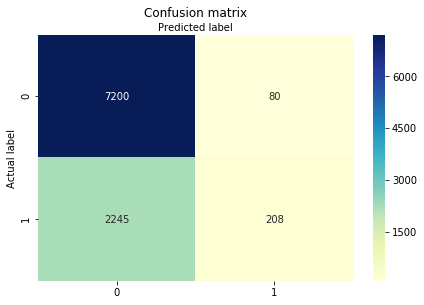

In [87]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7611219562313778
Precision: 0.7222222222222222
Recall: 0.08479412963717896


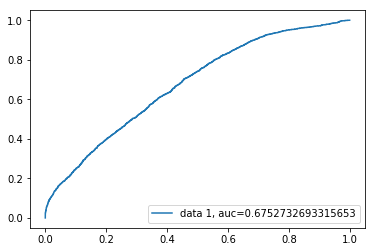

In [89]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()